In [1]:
import os
import pandas as pd
import sqlite3 as sql
import numpy as np

import time
from datetime import datetime

In [2]:
churn_result = pd.read_csv("../dataset/Churn_Results.csv")
churn_result.head()

,userId,Actual_Churn,Random_Forest_Probability,Calibrated_Random_Forest_Probability,Naive_Bias_Probability,Isotonic_Calibrated_Naive_Bias_Probability,Sigmoid_Calibrated_Naive_Bias_Probability,Churn_Score
0,985f1fc3-bce0-471e-b7b8-d518de876c26,1.0,0.391651,0.247715,0.648125,0.684556,0.741489,0.596375
1,9310554d-f01a-4e7d-bffb-00808e1beb3a,0.0,0.120654,0.033234,0.590879,0.680801,0.652669,0.428727
2,517721da-4043-4ec7-9805-581173ac6113,1.0,0.920096,0.972629,0.381928,0.323934,0.286382,0.716356
3,c02a56c0-200e-4dae-9add-cae2a779682c,1.0,0.916712,0.970763,0.516978,0.598095,0.521183,0.852265
4,4f1f7cf8-bfe3-4fea-b176-0cf8dfd80591,0.0,0.044038,0.016047,0.626129,0.684556,0.709142,0.422788


In [3]:
unique_churn_result = pd.read_csv("../dataset/Unique_Churn_Results.csv")
unique_churn_result.head()

,userId,Actual_Churn,Churn_Score,Random_Forest_Probability,Calibrated_Random_Forest_Probability,Naive_Bias_Probability,Isotonic_Calibrated_Naive_Bias_Probability,Sigmoid_Calibrated_Naive_Bias_Probability
0,0002C218-D30F-402E-AE08-1280AD4FB669,1.0,0.832141,0.731484,0.874370,0.584981,0.649804,0.658299
1,00095350-9e64-4b34-9112-b9869703248b,1.0,0.972889,0.974088,0.983857,0.646214,0.684556,0.738415
2,00095653-80f8-4fba-93d9-44ae70bb6263,1.0,0.769485,0.939572,0.978172,0.430832,0.398299,0.370653
3,0010E3BE-81BD-48A3-8282-8C8D0B1F9629,0.0,0.444815,0.355808,0.306935,0.468026,0.454924,0.452065
4,0015a4a8-99f1-4119-9e10-0ac9773ae48a,1.0,0.913942,0.977035,0.983986,0.555581,0.650397,0.591459


In [4]:
print(unique_churn_result.shape[0])
print(unique_churn_result[unique_churn_result.Actual_Churn == 1].shape[0])
print(unique_churn_result[unique_churn_result.Churn_Score > 0.7].shape[0])
print(unique_churn_result[(unique_churn_result.Actual_Churn == 1) & (unique_churn_result.Churn_Score > 0.7)].shape[0])
print(unique_churn_result[(unique_churn_result.Actual_Churn == 1) & (unique_churn_result.Churn_Score < 0.7)].shape[0])
print(unique_churn_result[(unique_churn_result.Actual_Churn == 0) & (unique_churn_result.Churn_Score > 0.7)].shape[0])
print(unique_churn_result[(unique_churn_result.Actual_Churn == 0) & (unique_churn_result.Churn_Score < 0.7)].shape[0])

11004
7253
6472
6428
825
44
3707


In [5]:
def calc_accuracy(unique_churn_result, threshold):
    tp = unique_churn_result[(unique_churn_result.Actual_Churn == 1) & (unique_churn_result.Churn_Score > threshold)].shape[0]
    fp = unique_churn_result[(unique_churn_result.Actual_Churn == 0) & (unique_churn_result.Churn_Score > threshold)].shape[0]
    fn = unique_churn_result[(unique_churn_result.Actual_Churn == 1) & (unique_churn_result.Churn_Score < threshold)].shape[0]
    tn = unique_churn_result[(unique_churn_result.Actual_Churn == 0) & (unique_churn_result.Churn_Score < threshold)].shape[0]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall ) / (precision + recall)
    accuracy = (tp + tn) / unique_churn_result.shape[0]
    
    return precision, recall, f1, accuracy

In [6]:
threshold = 0.7
precision, recall, f1, accuracy = calc_accuracy(unique_churn_result, threshold)

In [7]:
print("\nPrecision: "+"{:0>2}".format(precision) + "\nRecall: " + "{:0>2}".format(recall) + "\nF1: "+"{:0>2}".format(f1) + "\nAccuracy: " + "{:0>2}".format(accuracy))


Precision: 0.9932014833127317
Recall: 0.8862539638770164
F1: 0.9366848816029144
Accuracy: 0.9210287168302436


In [8]:
threshold = 0.5
precision, recall, f1, accuracy = calc_accuracy(unique_churn_result, threshold)

print("\nPrecision: "+"{:0>2}".format(precision) + "\nRecall: " + "{:0>2}".format(recall) + "\nF1: "+"{:0>2}".format(f1) + "\nAccuracy: " + "{:0>2}".format(accuracy))


Precision: 0.9507032636897447
Recall: 0.9598786708948022
F1: 0.9552689352360045
Accuracy: 0.940748818611414


In [9]:
threshold = 0.9
precision, recall, f1, accuracy = calc_accuracy(unique_churn_result, threshold)

print("\nPrecision: "+"{:0>2}".format(precision) + "\nRecall: " + "{:0>2}".format(recall) + "\nF1: "+"{:0>2}".format(f1) + "\nAccuracy: " + "{:0>2}".format(accuracy))


Precision: 1.0
Recall: 0.4636702054322349
F1: 0.6335719668425019
Accuracy: 0.6464921846601236


In [10]:
train_df4 = pd.read_csv("../dataset/brochure_view_dataset.csv")
train_df4.head()

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,productId,...,install_year,install_month,install_day,churn,last_year,last_month,last_day,first_year,first_month,first_day
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,2.0,0.0,2017,7,31,2017,4,2
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,2.0,0.0,2017,7,31,2017,4,2
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,2.0,0.0,2017,7,31,2017,4,2
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,1.0,1.0,2017,6,21,2017,4,1
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,...,2017.0,4.0,2.0,0.0,2017,7,31,2017,4,2


In [11]:
train_df4.columns

Index(['userId', 'page_turn_count', 'view_duration', 'brochure_id', 'origin',
       'year', 'month', 'day', 'app_origin', 'productId', 'model',
       'campaignId', 'install_year', 'install_month', 'install_day', 'churn',
       'last_year', 'last_month', 'last_day', 'first_year', 'first_month',
       'first_day'],
      dtype='object')

In [12]:
train_df4[['productId','churn']].groupby(['productId']).mean()

,churn
productId,
com-bonial-kaufda,0.248051
de-kaufda-android,0.212519
de.kaufda.kaufda,0.630607


In [13]:
train_df4[['month','churn']].groupby(['month']).mean()

,churn
month,
4,0.510315
5,0.348601
6,0.138982
7,0.000000


In [15]:
df = train_df4[['campaignId','churn']].groupby(['campaignId']).mean()
res = df.apply(lambda x: x.sort_values(ascending=False).head(10))
res

,churn
campaignId,
zhqyx6,1.0
fhodpb,1.0
ftsm7j,1.0
fszw5i,1.0
si3jl4,1.0
st6twr,1.0
symmed,1.0
flvgcp,1.0
fl6sw4,1.0


In [16]:
# https://stackoverflow.com/a/18364570
def get_columns_bins(column_name):
    all_bins = []
  
    for method in bins_methods:
        start = datetime.now()
        hist, bin_edges = np.histogram(column_name,bins=method)
        all_bins.append(bin_edges)
        print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1]))
    return all_bins

In [17]:
# https://stackoverflow.com/a/18364570
def get_clustering_bins(s, quantile=0.3, n_samples=None):
    
    series = s.dropna().values.reshape(-1, 1)
    
    bandwidth = estimate_bandwidth(series, quantile=quantile, n_samples=n_samples)
    clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(series)

    d = pd.DataFrame(columns=['data_column', 'label_column'])

    d['data_column'] = series.reshape(-1)
    d['label_column'] = clustering.labels_
    
    sorted_vals = d.groupby('label_column')['data_column'].max().sort_values().values
    bins = np.insert(sorted_vals, [0] , [series.min()-1])
    bins[-1] = bins[-1] + 1
    
    return bins, range(bins.size-1)


In [18]:
train_df4.page_turn_count.min(),  train_df4.page_turn_count.median(), train_df4.page_turn_count.mean(), train_df4.page_turn_count.max()

(0, 9.0, 16.21616329268258, 375)

<AxesSubplot:>

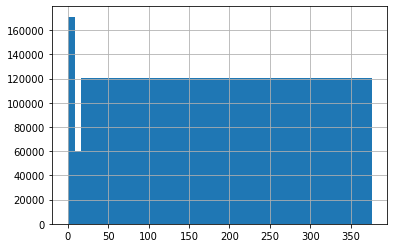

In [19]:
page_turn_count_bins = [-1, train_df4.page_turn_count.min(),  train_df4.page_turn_count.median(), train_df4.page_turn_count.mean(), train_df4.page_turn_count.max() +1 ]
train_df4.page_turn_count.hist(bins=page_turn_count_bins)

In [20]:
len(page_turn_count_bins), train_df4.page_turn_count.value_counts(bins=page_turn_count_bins)


(5,
 (0.0, 9.0]         177959
 (16.216, 376.0]    120547
 (9.0, 16.216]       51387
 (-1.001, 0.0]        1966
 Name: page_turn_count, dtype: int64)

In [21]:
train_df4['page_turn_count_category'] = pd.cut(train_df4.page_turn_count, page_turn_count_bins).cat.codes
train_df4.head(5)

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,productId,...,install_month,install_day,churn,last_year,last_month,last_day,first_year,first_month,first_day,page_turn_count_category
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,com-bonial-kaufda,...,4.0,2.0,0.0,2017,7,31,2017,4,2,3
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,com-bonial-kaufda,...,4.0,2.0,0.0,2017,7,31,2017,4,2,1
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,...,4.0,2.0,0.0,2017,7,31,2017,4,2,1
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,past,2017,4,30,past,com-bonial-kaufda,...,4.0,1.0,1.0,2017,6,21,2017,4,1,3
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,...,4.0,2.0,0.0,2017,7,31,2017,4,2,1


In [22]:
train_df4[['page_turn_count_category','churn']].groupby(['page_turn_count_category']).mean()

,churn
page_turn_count_category,
0,0.000000
1,0.267814
2,0.242007
3,0.220860


In [23]:
train_df4.view_duration.min(),  train_df4.view_duration.median(), train_df4.view_duration.mean(), train_df4.view_duration.max()

(-18000.0, 40000.0, 89339.81622012438, 4009200.0)

<AxesSubplot:>

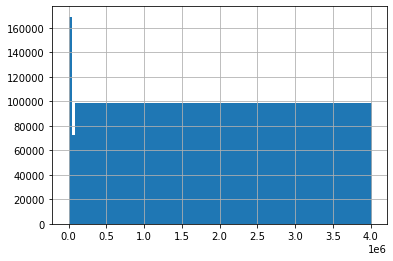

In [24]:
view_duration_bins = [train_df4.view_duration.min(), 0, train_df4.view_duration.median(), train_df4.view_duration.mean(), train_df4.view_duration.max() +1 ]
train_df4.view_duration.hist(bins=view_duration_bins)

In [25]:
len(view_duration_bins), train_df4.view_duration.value_counts(bins=view_duration_bins)


(5,
 (0.0, 40000.0]            170877
 (89339.816, 4009201.0]     98675
 (40000.0, 89339.816]       70687
 (-18000.001, 0.0]              5
 Name: view_duration, dtype: int64)

In [26]:
train_df4['view_duration_category'] = pd.cut(train_df4.view_duration, view_duration_bins).cat.codes
train_df4.head(5)

,userId,page_turn_count,view_duration,brochure_id,origin,year,month,day,app_origin,productId,...,install_day,churn,last_year,last_month,last_day,first_year,first_month,first_day,page_turn_count_category,view_duration_category
0,9491a960-206a-4a58-9177-e78cb1f05e70,30,95172.0,672239440,past,2017,4,30,past,com-bonial-kaufda,...,2.0,0.0,2017,7,31,2017,4,2,3,3
1,9491a960-206a-4a58-9177-e78cb1f05e70,2,4000.0,673861625,past,2017,4,30,past,com-bonial-kaufda,...,2.0,0.0,2017,7,31,2017,4,2,1,1
2,9491a960-206a-4a58-9177-e78cb1f05e70,1,14000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,...,2.0,0.0,2017,7,31,2017,4,2,1,1
3,fa623647-dfc9-49b4-bbb6-77cbacd599f4,64,168000.0,672658544,past,2017,4,30,past,com-bonial-kaufda,...,1.0,1.0,2017,6,21,2017,4,1,3,3
4,9491a960-206a-4a58-9177-e78cb1f05e70,1,33000.0,660764240,past,2017,4,30,past,com-bonial-kaufda,...,2.0,0.0,2017,7,31,2017,4,2,1,1


In [27]:
train_df4[['install_month','churn']].groupby(['install_month']).mean()

,churn
install_month,
1.0,0.245939
4.0,0.259491
5.0,0.229693


In [28]:
train_df4[['view_duration_category','churn']].groupby(['view_duration_category']).mean()

,churn
view_duration_category,
-1,0.249397
0,0.000000
1,0.262616
2,0.239393
3,0.223218


In [29]:
train_df4.columns

Index(['userId', 'page_turn_count', 'view_duration', 'brochure_id', 'origin',
       'year', 'month', 'day', 'app_origin', 'productId', 'model',
       'campaignId', 'install_year', 'install_month', 'install_day', 'churn',
       'last_year', 'last_month', 'last_day', 'first_year', 'first_month',
       'first_day', 'page_turn_count_category', 'view_duration_category'],
      dtype='object')

In [30]:
#Calculate correlations
corr = train_df4.corr()
corr

,page_turn_count,view_duration,brochure_id,year,month,day,install_year,install_month,install_day,churn,last_year,last_month,last_day,first_year,first_month,first_day,page_turn_count_category,view_duration_category
page_turn_count,1.000000,0.449893,-0.008100,NaN,0.041716,0.010275,0.033035,0.031681,0.030464,-0.044290,0.030194,0.041553,0.044436,0.030194,0.029371,0.030501,0.818468,0.615756
view_duration,0.449893,1.000000,0.027973,NaN,0.029504,0.002037,0.104426,0.099498,0.070923,-0.024025,0.098843,0.106548,0.091863,0.098843,0.095253,0.070882,0.384386,0.613703
brochure_id,-0.008100,0.027973,1.000000,NaN,0.597948,0.092768,0.013817,0.052030,0.083307,-0.264502,0.002703,0.077584,0.113093,0.002703,0.044239,0.083372,-0.015900,0.019188
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.041716,0.029504,0.597948,NaN,1.000000,-0.130816,0.007545,0.071333,0.101251,-0.413182,-0.011841,0.105510,0.146947,-0.011841,0.057519,0.100850,0.033625,0.029977
day,0.010275,0.002037,0.092768,NaN,-0.130816,1.000000,-0.017760,-0.010803,0.088527,-0.032205,-0.024050,-0.004648,0.048611,-0.024050,-0.015955,0.089108,0.004358,-0.000405
install_year,0.033035,0.104426,0.013817,NaN,0.007545,-0.017760,1.000000,0.964726,0.642789,0.000757,0.935706,0.936018,0.794022,0.935706,0.912155,0.629429,0.034036,0.080641
install_month,0.031681,0.099498,0.052030,NaN,0.071333,-0.010803,0.964726,1.000000,0.618015,-0.006919,0.902699,0.910899,0.763895,0.902699,0.951479,0.605086,0.031873,0.076350
install_day,0.030464,0.070923,0.083307,NaN,0.101251,0.088527,0.642789,0.618015,1.000000,-0.032621,0.601461,0.620418,0.538655,0.601461,0.584156,0.993630,0.030326,0.060839
churn,-0.044290,-0.024025,-0.264502,NaN,-0.413182,-0.032205,0.000757,-0.006919,-0.032621,1.000000,0.008552,-0.192225,-0.246140,0.008552,-0.000305,-0.031815,-0.042568,-0.034501


In [31]:
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.01
top_corr_columns = cr.loc[:, 'churn'][:-1]
best_corr_columns = top_corr_columns[abs(top_corr_columns) > 0.01].sort_values(ascending=False)
len(best_corr_columns)

11

In [32]:
best_corr_columns

churn                       1.000000
view_duration              -0.024025
first_day                  -0.031815
day                        -0.032205
install_day                -0.032621
page_turn_count_category   -0.042568
page_turn_count            -0.044290
last_month                 -0.192225
last_day                   -0.246140
brochure_id                -0.264502
month                      -0.413182
Name: churn, dtype: float64